## Load model

In [2]:
import torch
from bytelatent.model.blt import ByteLatentTransformerArgs, ByteLatentTransformer

# Path to your saved checkpoint
checkpoint_path = 'checkpoints/model_best.pth'  # adjust to your saved path

ModuleNotFoundError: No module named 'bytelatent.data'

In [2]:
# Create model args matching the saved model architecture exactly
checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

model_state_dict = checkpoint['model_state_dict']
model_args = ByteLatentTransformerArgs(
    seed=777,
    vocab_size=4096,
    # These parameters must match the saved model
    dim=256,  # Based on your training code
    n_layers_global=8,  # Confirmed from state_dict keys
    n_layers_local_decoder=4,  # Confirmed from state_dict keys
    n_layers_local_encoder=4,  # Confirmed from state_dict keys
    
    patch_size=8,
    patching_mode="static",
    tie_local_encoder_decoder_logits=False,
    patch_in_forward=False,
    max_encoder_seq_length=512,
    pad_to_max_length=True,
    patching_threshold=3.1439168453216553,
    encoder_hash_byte_group_size=[4],
    encoder_hash_byte_group_vocab=50002,
    encoder_hash_byte_group_nb_functions=3,
    encoder_enable_byte_ngrams=False,
    cross_attn_encoder=True,
    cross_attn_decoder=True,
    cross_attn_window_encoder=None,
    cross_attn_window_decoder=None,
    dim_local_encoder=128,
    dim_local_decoder=128,
    cross_attn_k=2,  # From your training code
    cross_attn_nheads=4,  # From your training code
    cross_attn_all_layers_decoder=True,
    cross_attn_all_layers_encoder=True,
    cross_attn_use_flex_attention=False,
    cross_attn_init_by_pooling=True,
    log_patch_lengths=True,
    non_linearity="swiglu",
    use_rope=True,
    recompute_fc1_out=False,
    recompute_fc3_out=False,
    recompute_attn=False,
    custom_bwd=False,
    layer_ckpt="none",
    use_local_encoder_transformer=True,
    init_use_gaussian=True,
    init_use_depth="current",
    attn_impl="sdpa",
    attn_bias_type="causal",
    alpha_depth="disabled",
    max_length=512,
    local_attention_window_len=512,
    max_seqlen=512,
    downsampling_by_pooling="max",
)

# Create the model
model = ByteLatentTransformer(model_args)

# Load the state dict from the checkpoint (remove the '_orig_mod.' prefix)
model_state_dict = {k.replace('_orig_mod.', ''): v for k, v in checkpoint['model_state_dict'].items()}

# Load the state dict into the model
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [3]:
# Load the checkpoint
# # Load just the model state dict
# # Load the checkpoint with weights_only=False
# checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

# model_state_dict = checkpoint['model_state_dict']
# # # model.load_state_dict(state_dict)
# # model_args = ByteLatentTransformerArgs(
# #         vocab_size=4096,
# #         dim=256,
#         n_layers_global=8,
#         n_layers_local_decoder=4,
#         n_layers_local_encoder=4,
#         patch_size=8,
#         patching_mode="static",
#         tie_local_encoder_decoder_logits=False,
#         patch_in_forward=False,
#         max_encoder_seq_length=512,
#         pad_to_max_length=True,
#         patching_threshold=3.1439168453216553,
#         encoder_hash_byte_group_size=[4],
#         encoder_hash_byte_group_vocab=50002,
#         encoder_hash_byte_group_nb_functions=3,
#         encoder_enable_byte_ngrams=False,
#         cross_attn_encoder=True,
#         cross_attn_decoder=True,
#         cross_attn_window_encoder=None,
#         cross_attn_window_decoder=None,
#         dim_local_encoder=128,
#         dim_local_decoder=128,
#         cross_attn_k=2,
#         cross_attn_nheads=4,
#         cross_attn_all_layers_decoder=True,
#         cross_attn_all_layers_encoder=True,
#         cross_attn_use_flex_attention=False,
#         cross_attn_init_by_pooling=True,
#         log_patch_lengths=True,
#         non_linearity="swiglu",
#         use_rope=True,
#         recompute_fc1_out=False,
#         recompute_fc3_out=False,
#         recompute_attn=False,
#         custom_bwd=False,
#         layer_ckpt="none",
#         use_local_encoder_transformer=True,
#         init_use_gaussian=True,
#         init_use_depth="current",
#         attn_impl="sdpa",
#         attn_bias_type="causal",
#         alpha_depth="disabled",
#         max_length=512,
#         local_attention_window_len=512,
#         max_seqlen=512,
#         downsampling_by_pooling="max",
#     )

# # Create the model
# model = ByteLatentTransformer(model_args)
# # Load the state dict from the checkpoint (DDP models save with 'module.' prefix)
# model_state_dict = checkpoint['model_state_dict']
# # Remove 'module.' prefix if it exists (from DDP)
# if list(model_state_dict.keys())[0].startswith('module.'):
#     model_state_dict = {k[7:]: v for k, v in model_state_dict.items()}
# # Load the state dict into the model
# model.load_state_dict(model_state_dict)

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Put the model in evaluation mode
model.eval()

print(f"Model loaded successfully from {checkpoint_path}")
print(f"Trained for {checkpoint['epoch']+1} epochs")
print(f"Final loss: {checkpoint['loss']}")

Model loaded successfully from checkpoints/model_best.pth
Trained for 3 epochs
Final loss: 3.2631458002328873


In [4]:
# # Move to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

# # Put the model in evaluation mode
# model.eval()

# print(f"Model loaded successfully from {checkpoint_path}")
# print(f"Trained for {checkpoint['epoch']+1} epochs")
# print(f"Final loss: {checkpoint['loss']}")

In [5]:
# # Create the model
# model = ByteLatentTransformer(model_args)
# # Load the state dict from the checkpoint (DDP models save with 'module.' prefix)
# model_state_dict = checkpoint['model_state_dict']
# # Remove 'module.' prefix if it exists (from DDP)
# if list(model_state_dict.keys())[0].startswith('module.'):
#     model_state_dict = {k[7:]: v for k, v in model_state_dict.items()}
# # Load the state dict into the model
# model.load_state_dict(model_state_dict)

# # Move to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

# # Put the model in evaluation mode
# model.eval()

# print(f"Model loaded successfully from {checkpoint_path}")
# print(f"Trained for {checkpoint['epoch']+1} epochs")
# print(f"Final loss: {checkpoint['loss']}")

In [4]:
from dataloader import DataLoaderBLT
batch_size = 1
seq_len = 512
data_loader = DataLoaderBLT(batch_size=batch_size, seq_length=seq_len, split="val")



In [5]:
l = torch.full((batch_size,64), 8).to('cuda')
l[:,0] = 1
l[:,-1] = 10
l[:,2] = 11
l[:,1] = 10
patch_lengths = l
patch_lengths.shape

torch.Size([1, 64])

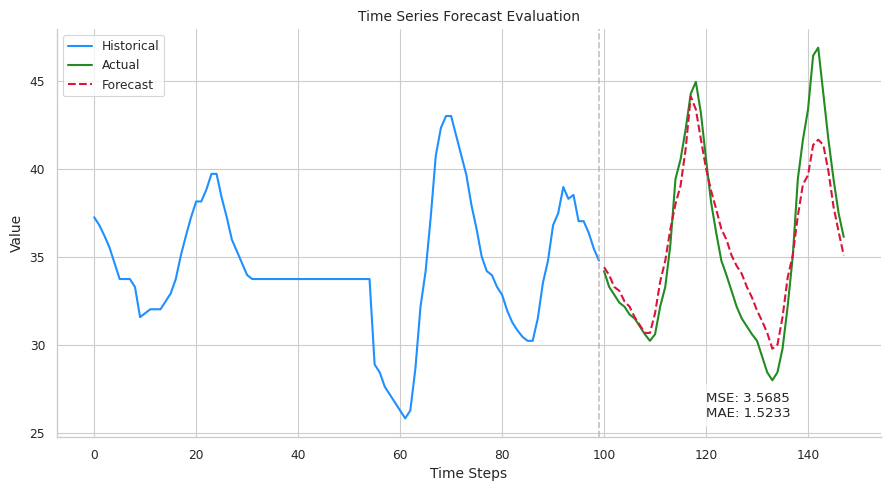

Mean Squared Error (MSE): 3.5685
Mean Absolute Error (MAE): 1.5233

Actual vs Predicted Values:


,Actual,Predicted,Difference
0,34.2055,34.4296,-0.2241
1,33.3093,33.9815,-0.6722
2,32.8612,33.3093,-0.4481
3,32.4131,33.0853,-0.6722
4,32.1891,32.4878,-0.2987
5,31.7410,32.1891,-0.4481
6,31.5169,31.5916,-0.0747
7,31.0688,31.1435,-0.0747
8,30.6207,30.6954,-0.0747
9,30.2473,30.6954,-0.4481


In [141]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Set Seaborn styling
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1)

# Get a batch of data
x, _, _, y, scale, _ = data_loader.next_batch_random()

# Store the full sequence before truncation
full_sequence = x.clone()

# Remove the last 48 points from the input
truncated_x = x[:, :-48].clone()

# Pad the truncated sequence back to 512 tokens
padded_x = torch.cat([truncated_x[:, :48].repeat(1, 1), truncated_x], dim=1)[:, -512:]

# Make sure we have 512 tokens
assert padded_x.shape[1] == 512, f"Expected context length 512, got {padded_x.shape[1]}"

# Use this as our starting point
x = padded_x.clone()

# Store forecasted tokens
forecasted_tokens = []

# Forecast 48 points
for i in range(48):
    with torch.no_grad():
        # Forward pass with current context window
        logits = model(x, patch_lengths)
        
        # Get predictions for the next token (last position)
        last_token_logits = logits[:, -1, :]
        last_token_probs = torch.softmax(last_token_logits, dim=-1)
        
        # Sample next token
        sampled_token = torch.multinomial(last_token_probs, num_samples=1)
        
        # Store the forecasted token
        forecasted_tokens.append(sampled_token.cpu().item())
        
        # Shift context window: remove oldest token and add new prediction
        x = torch.cat([x[:, 1:], sampled_token], dim=1)

# Convert forecasted tokens to a tensor
forecasted_tokens_tensor = torch.tensor(forecasted_tokens, device=x.device).unsqueeze(0)

# Get the actual tokens that were removed (for comparison)
actual_tokens = full_sequence[:, -48:].cpu().numpy().flatten()

# Dequantize both predicted and actual tokens
forecasted_values = data_loader.quantizer.dequantize(forecasted_tokens_tensor, scale).cpu().numpy().flatten()
actual_values = data_loader.quantizer.dequantize(torch.tensor(actual_tokens, device=x.device).unsqueeze(0), scale).cpu().numpy().flatten()

# Get context data for plotting
context_tokens = truncated_x[0, -100:].cpu().numpy()
context_values = data_loader.quantizer.dequantize(torch.tensor(context_tokens, device=x.device).unsqueeze(0), scale).cpu().numpy().flatten()

# Create a DataFrame for better Seaborn plotting
all_timesteps = np.arange(len(context_values) + len(actual_values))
all_values = []
all_types = []

# Add context data
for i, val in enumerate(context_values):
    all_values.append(val)
    all_types.append('Historical')

# Add actual future values
for i, val in enumerate(actual_values):
    all_values.append(val)
    all_types.append('Actual')

# Create dataframe
plot_df = pd.DataFrame({
    'Timestep': all_timesteps,
    'Value': all_values,
    'Type': all_types
})

# Create forecast dataframe separately (to use dashed line)
forecast_timesteps = np.arange(len(context_values), len(context_values) + len(forecasted_values))
forecast_df = pd.DataFrame({
    'Timestep': forecast_timesteps,
    'Value': forecasted_values,
    'Type': ['Forecast'] * len(forecasted_values)
})

# Calculate error metrics
mse = np.mean((forecasted_values - actual_values) ** 2)
mae = np.mean(np.abs(forecasted_values - actual_values))

# Create the plot
plt.figure(figsize=(9, 5))
sns.lineplot(data=plot_df, x='Timestep', y='Value', hue='Type', 
             palette={'Historical': 'dodgerblue', 'Actual': 'forestgreen'}, 
             linewidth=1.5)

# Add the forecast with dashed line
sns.lineplot(data=forecast_df, x='Timestep', y='Value', 
             color='crimson', linestyle='--', label='Forecast', linewidth=1.5)

# Add vertical line indicating prediction start
plt.axvline(x=len(context_values)-1, color='darkgray', linestyle='--', alpha=0.7)

# Add annotations
plt.title(f'Time Series Forecast Evaluation', fontsize=10)
plt.text(len(context_values) + 20, min(all_values) + 0.1, 
         f'MSE: {mse:.4f}\nMAE: {mae:.4f}',
         bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# Improve the layout
plt.xlabel('Time Steps', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.legend(title=None, loc='best')
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

# Print quantitative comparison
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Detailed comparison dataframe with styled output
comparison = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': forecasted_values,
    'Difference': actual_values - forecasted_values
})

print("\nActual vs Predicted Values:")
pd.set_option('display.precision', 4)
display(comparison.head(10))  # Show first 10 rows for brevity

## BLT Local Models

In [ ]:
# Copyright (c) Meta Platforms, Inc. and affiliates.
import os
from dataclasses import replace

import numpy as np
import pytest
import torch

from bytelatent.constants import BLT_DATA
from bytelatent.data.data_types import Batch
from bytelatent.data.ngram_processor import NgramProcessor
from bytelatent.model.blt import (
    ByteLatentTransformer,
    ByteLatentTransformerArgs,
    EmbeddingType,
    compute_hash_embeddings,
    create_global_transformer,
    create_local_decoder,
    create_local_encoder,
    cross_attn_mask,
    decoder_patch_ids_from_lengths,
    get_blt_input,
    init_embeddings,
    patch_ids_from_lengths,
)
from bytelatent.model.latent_transformer import CrossAttention
from bytelatent.model.utils import create_causal_mask
from bytelatent.optim import OptimArgs, build_optimizer
from bytelatent.tokenizers.constants import EOS_ID
from bytelatent.train import compute_loss


def batch_to_tensors_and_gpu(batch):
    x = torch.from_numpy(batch.x)
    y = torch.from_numpy(batch.y)
    mask = None if batch.mask is None else torch.from_numpy(batch.mask)
    patch_lengths = (
        None if batch.patch_lengths is None else torch.from_numpy(batch.patch_lengths)
    )
    ngram_ids = None if batch.ngram_ids is None else torch.from_numpy(batch.ngram_ids)

    if torch.cuda.is_available():
        x = x.cuda()
        y = y.cuda()
        if mask is not None:
            mask = mask.cuda()
        if patch_lengths is not None:
            patch_lengths = patch_lengths.cuda()
        if ngram_ids is not None:
            ngram_ids = ngram_ids.cuda()
    return x, y, mask, patch_lengths, ngram_ids


def fake_batch():
    batch_dict = torch.load(os.path.join(BLT_DATA, "test_batch.pt"), weights_only=False)
    del batch_dict["x2"]
    del batch_dict["y2"]
    del batch_dict["src_names"]
    return Batch(**batch_dict)

In [ ]:
import logging
import os

import torch
from torch.nn.attention.flex_attention import create_block_mask
from xformers.ops import fmha

logger = logging.getLogger()


def patch_reduce(h, max_num_patches, reduction, patch_ids):
    """
    Reduce variable length patches to single embedding per patch
    Note: this works with variable number of patches for different sequences in the batch
    It handles variable length patches by assuming that patch_lengths will be 0 for any
    extra patches on the *right*. Since there can be a variable number of patches
    this function also return the number of patches for each sequence in the batch.
    Any embeddings on the right that are not allocated to a patch
    (i.e. if the sum(patch_lengths[i]) < seq_len for any i)
    will be sent to a dummy patch, which is trimmed before returning.
    """
    bs, seq_len, emb_dim = h.shape

    patch_ids = patch_ids.unsqueeze(-1).expand(-1, -1, h.shape[-1])

    reduced_embs = torch.zeros(
        (bs, max_num_patches, emb_dim), dtype=h.dtype, device=h.device
    )
    reduced_embs = reduced_embs.scatter_reduce(
        src=h,
        dim=1,
        index=patch_ids,
        reduce=reduction,
        include_self=False,
    )
    reduced_embs = reduced_embs[:, :max_num_patches, :]

    return reduced_embs

In [ ]:
tokens = torch.randint(0, 100, (2, 10))
h = torch.randn(2, 10, 3)

max_num_patches = 5
reduction = "max"
patch_ids = torch.tensor([[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 0, 0, 1, 1, 1, 2, 2, 2, 2]])

In [ ]:
patch_ids

In [ ]:
patch_reduced = patch_reduce(h, max_num_patches, reduction, patch_ids)
print(patch_reduced.shape)  # Should print (2, 5, 512)

In [ ]:
patch_reduced

In [ ]:
def pooling_downsample(h, max_num_patches, pooling_mode, patch_ids):
    cat = []
    if "avg" in pooling_mode or "mean" in pooling_mode:
        cat.append(patch_reduce(h, max_num_patches, "mean", patch_ids))
    if "min" in pooling_mode:
        cat.append(patch_reduce(h, max_num_patches, "amin", patch_ids))
    if "max" in pooling_mode:
        cat.append(patch_reduce(h, max_num_patches, "amax", patch_ids))
    assert len(cat) > 0
    h = torch.cat(cat, dim=-1)
    return h

In [ ]:
pooling_downsample(
    h,
    max_num_patches,
    pooling_mode="avg",
    patch_ids=patch_ids,
)

In [ ]:
from bytelatent.model.local_models import LocalEncoder

In [ ]:
from bytelatent.model.local_models import LocalModelArgs

local_encoder_args = LocalModelArgs(
    # Core transformer dimensions
    dim=64,                 # Main transformer hidden size
    dim_token_emb=64,       # Token embedding dimension before projection
    dim_patch_emb=64,       # Output of downsampling (patch embedding dimension)
    
    # Attention settings
    n_heads=1,               # Transformer attention heads
    n_kv_heads=1,            # Key/Value heads
    head_dim=64,             # dim / n_heads = 512 / 8 = 64
    
    # Transformer architecture
    n_layers=4,              # Number of transformer blocks
    dropout=0.1,             # Dropout rate
    norm_eps=1e-5,           # LayerNorm epsilon

    # Vocabulary and positional encoding
    vocab_size=4096,         # Size of tokenizer vocabulary
    # max_length=1024,         # Max length for absolute pos embeddings (used if rope is off)
    max_seqlen=1024,         # Max for rotary embeddings (if rope is on)
    eos_id=2,                # End-of-sequence token ID

    # Patching setup
    patch_size=16,           # Avg or fixed patch size
    patching_mode="fixed", # Or "space", "fixed"
    downsampling_by_pooling="max",  # Options: "mean", "max", "avgmax", etc.
    
    # Cross-attention configuration
    cross_attn_encoder=True,
    cross_attn_decoder=True,
    cross_attn_all_layers_encoder=True,  # Optional: True = all layers get cross-attn
    cross_attn_all_layers_decoder=True,
    cross_attn_k=1,                        # Expands patch embeddings: P -> P * k
    cross_attn_init_by_pooling=True,      # Pooling used to init patch-level embeddings
    cross_attn_nheads=1,

    # Patching and token configuration
    encoder_hash_byte_group_size=None,    # Only needed for hash-based patching
    use_local_encoder_transformer=True,
    use_rope=True,
    rope_theta=10000,
    rope_use_fp32_in_outer_product=True,

    # Misc
    sliding_window=512,                   # Needed for local_block_causal attention
    attn_impl="xformers",                 # Fast attention backend
    attn_bias_type="local_block_causal",  # Supports sliding windows
    init_std_factor="dim_ratio",          # For better init stability
)


In [ ]:
args = local_encoder_args

In [ ]:
local_encoder = LocalEncoder(args)

In [ ]:
local_encoder = local_encoder.cuda()

In [ ]:
(h_encoder, h_cross), cache_encoder = local_encoder(tokens = tokens.to('cuda'), patch_ids=patch_ids.to('cuda'), num_patches=5)

In [ ]:
h_encoder.shape, h_cross.shape 

In [ ]:
tokens

In [ ]:
patch_ids

In [ ]:
h_cross[1]

In [ ]:
from bytelatent.model.local_models import LocalDecoder
from bytelatent.model.local_models import LocalModelArgs

local_encoder_args = LocalModelArgs(
    # Core transformer dimensions
    dim=64,                 # Main transformer hidden size
    dim_token_emb=64,       # Token embedding dimension before projection
    dim_patch_emb=64,       # Output of downsampling (patch embedding dimension)
    
    # Attention settings
    n_heads=1,               # Transformer attention heads
    n_kv_heads=1,            # Key/Value heads
    head_dim=64,             # dim / n_heads = 512 / 8 = 64
    
    # Transformer architecture
    n_layers=4,              # Number of transformer blocks
    dropout=0.1,             # Dropout rate
    norm_eps=1e-5,           # LayerNorm epsilon

    # Vocabulary and positional encoding
    vocab_size=4096,         # Size of tokenizer vocabulary
    # max_length=1024,         # Max length for absolute pos embeddings (used if rope is off)
    max_seqlen=1024,         # Max for rotary embeddings (if rope is on)
    eos_id=2,                # End-of-sequence token ID

    # Patching setup
    patch_size=16,           # Avg or fixed patch size
    patching_mode="fixed", # Or "space", "fixed"
    downsampling_by_pooling="max",  # Options: "mean", "max", "avgmax", etc.
    
    # Cross-attention configuration
    cross_attn_encoder=True,
    cross_attn_decoder=True,
    cross_attn_all_layers_encoder=True,  # Optional: True = all layers get cross-attn
    cross_attn_all_layers_decoder=True,
    cross_attn_k=1,                        # Expands patch embeddings: P -> P * k
    cross_attn_init_by_pooling=False,      # Pooling used to init patch-level embeddings
    cross_attn_nheads=1,

    # Patching and token configuration
    encoder_hash_byte_group_size=None,    # Only needed for hash-based patching
    use_local_encoder_transformer=True,
    use_rope=True,
    rope_theta=10000,
    rope_use_fp32_in_outer_product=True,

    # Misc
    sliding_window=512,                   # Needed for local_block_causal attention
    attn_impl="xformers",                 # Fast attention backend
    attn_bias_type="local_block_causal",  # Supports sliding windows
    init_std_factor="dim_ratio",          # For better init stability
)


In [ ]:

local_decoder = LocalDecoder(args)
local_decoder = local_decoder.cuda()

In [ ]:
patch_lengths = torch.tensor([[1,3,2,2,2], [1,3,4,1,1]])
patch_lengths.shape

In [ ]:
tokens.to('cuda'), patch_ids, patch_lengths

In [ ]:
h = h_encoder
patch_embds = h_cross

In [ ]:
patch_lengths,tokens.shape[-1],patch_lengths[0, 0]

In [ ]:
decoder_patch_ids = decoder_patch_ids_from_lengths(
    patch_lengths, 0, tokens.shape[-1]
)

In [ ]:
decoder_patch_ids

In [ ]:
patch_ids

In [ ]:
cross_attn_mask_dec = cross_attn_mask(
    decoder_patch_ids.to('cuda'),
    patch_lengths.to('cuda'),
    N=tokens.shape[-1],
    patches_as_queries=False,
    cross_attn_k=args.cross_attn_k,
    window=None,  # 🔥 use None instead of 512
    block_mask=True,
)


In [ ]:
decoder_out = local_decoder(
    embeds = h.to('cuda'),
    patch_embeds = patch_embds.to('cuda'),
    tokens = tokens.to('cuda')
)

In [ ]:
output, _ = decoder_out
output.shape

In [ ]:
# softmax output
output = torch.nn.functional.softmax(output, dim=-1)
# sample from the output
# Take the logits for the last time step
last_step_probs = output[:, -1, :]  # shape: (batch_size, vocab_size)

# Sample one token per batch
sampled = torch.multinomial(last_step_probs, num_samples=1)  # shape: (batch_size, 1)


## BLT Full Model

In [ ]:
import torch
from bytelatent.model.blt import ByteLatentTransformerArgs, ByteLatentTransformer
from bytelatent.tokenizers.constants import BOE_ID, BOS_ID, EOS_ID, PAD_ID

# Create the arguments objectfrom bytelatent.model.blt import ByteLatentTransformerArgs

args = ByteLatentTransformerArgs(
    seed=777,
    vocab_size=4096,
    dim=128,
    n_layers_global = 2,
    n_layers_local_decoder = 2,
    n_layers_local_encoder= 2,
    patch_size=8,
    patching_mode="static",
    tie_local_encoder_decoder_logits=False,
    patch_in_forward=False,
    max_encoder_seq_length=512,
    pad_to_max_length=True,
    patching_threshold=3.1439168453216553,
    encoder_hash_byte_group_size=[4 ],
    encoder_hash_byte_group_vocab=50002,
    encoder_hash_byte_group_nb_functions=3,
    encoder_enable_byte_ngrams=False,
    cross_attn_encoder=True,
    cross_attn_decoder=True,
    cross_attn_window_encoder=None,
    cross_attn_window_decoder=None,
    dim_local_encoder=128,
    dim_local_decoder=128,
    cross_attn_k=1,
    cross_attn_nheads=2,
    cross_attn_all_layers_decoder=True,
    cross_attn_all_layers_encoder=True,
    cross_attn_use_flex_attention=False,
    cross_attn_init_by_pooling=True,
    log_patch_lengths=True,
    non_linearity="swiglu",
    use_rope=True,
    recompute_fc1_out=False,
    recompute_fc3_out=False,
    recompute_attn=False,
    custom_bwd=False,
    layer_ckpt="none",
    use_local_encoder_transformer=True,
    init_use_gaussian=True,
    init_use_depth="current",
    attn_impl="sdpa",
    attn_bias_type="causal",
    alpha_depth="disabled",
    max_length=512,
    local_attention_window_len=512,
    max_seqlen=512,
    downsampling_by_pooling="max",
)
# Create the model
model = ByteLatentTransformer(args)
model = model.cuda()
## Import data loader
batch_size = 8
seq_len = 512
from dataloader import DataLoaderBLT
data_loader = DataLoaderBLT(batch_size=batch_size, seq_length=seq_len)


l = torch.full((batch_size,64), 8).to('cuda')
l[:,0] = 1
l[:,-1] = 10
l[:,2] = 11
l[:,1] = 10


for i in range(20):
    x, _, _, y, _ , _= data_loader.next_batch_random()

    out = model(x.to('cuda'), patch_lengths.to('cuda'))

In [ ]:
out.shape

In [ ]:
l = torch.full((batch_size,64), 8).to('cuda')
l[:,0] = 1
l[:,-1] = 10
l[:,2] = 11
l[:,1] = 10
patch_lengths.shape


In [ ]:
l[0]

In [ ]:
x, _, _, y, _ , _= data_loader.next_batch_random()
x.shape

In [ ]:
num_params = sum(p.numel() for p in model.parameters())
print(f"Model size: {num_params / 1e6:.2f} M parameters")

In [ ]:
seq_len = 6
batch_size = 1

t = torch.randint(0,4096,(batch_size,seq_len)).to('cuda')
# t[:,0] = 0

l = torch.full((batch_size,4), 1).to('cuda')
l[:,0] = 1
l[0,1] = 4
# l[1,1] = 3
l[0,2] = 3
# l[1,2] = 4
l[:,-1] = 4

# True if l[1].sum().item() == seq_len else l[1].sum().item()

In [ ]:
## Import data loader
batch_size = 8
seq_len = 512
from dataloader import DataLoaderBLT
data_loader = DataLoaderBLT(batch_size=batch_size, seq_length=seq_len)


l = torch.full((batch_size,128), 4).to('cuda')
l[:,0] = 1
l[:,-1] = 4
l[:,2] = 7
l[:,1] = 4
patch_lengths = l

In [ ]:
patch_lengths[0].sum()

In [ ]:
for i in range(20):
    x, _, _, y, _ , _= data_loader.next_batch_random()

    out = model(x.to('cuda'), patch_lengths.to('cuda'))

In [ ]:
out.shape

## Colab part

In [ ]:
import torch
import os
os.environ["BLT_ALLOW_MISSING_FLEX_ATTENTION"] = "1"
from torch.nn.attention.flex_attention import create_block_mask
torch.__version__

old torch == '2.5.0+cu121'

In [ ]:
seq_len = 512

t = torch.randint(5,260,(1,seq_len)).to('cuda')
# t[:,0] = 0

l = torch.full((1,35), 15).to('cuda')
l[:,0] = 1
l[:,1] = 15
l[:,2] = 14
l[:,-1] = 17

True if l.sum().item() == seq_len else l.sum().item()

### Encoder Pass

In [ ]:
def patch_ids_from_lengths(patch_lengths, seq_len):
    bs, num_patches = patch_lengths.shape
    # Create a tensor of cumulative sums of the patch lengths
    cum_d = torch.cat(
        [
            torch.zeros(bs, 1, dtype=patch_lengths.dtype, device=patch_lengths.device),
            patch_lengths.cumsum(dim=-1),
        ],
        dim=-1,
    )
    print(cum_d)
    patch_ids = (cum_d.unsqueeze(-1) <= torch.arange(seq_len, device=cum_d.device)).sum(
        dim=-2
    ) - 1
    print(patch_ids)
    assert not (
        torch.max(patch_ids) > patch_lengths.shape[-1] or torch.min(patch_ids) < 0
    ), f"{torch.max(patch_ids)} > {patch_lengths.shape[-1]} or {torch.min(patch_ids)} < 0"
    return patch_ids
pi = patch_ids_from_lengths(l, seq_len)

In [ ]:
bs, N = t.shape

In [ ]:
t.shape, l.shape

In [ ]:
num_patches = l.shape[1]
patch_ids = pi

kv_ids = patch_ids.unsqueeze(1).expand(bs, num_patches, seq_len)
q_ids = (
    torch.arange(num_patches, device=patch_ids.device)
    .unsqueeze(0)
    .unsqueeze(-1)
    .expand(bs, num_patches, seq_len)
)

In [ ]:
kv_ids.shape, q_ids.shape

In [ ]:
mask = q_ids == kv_ids.to('cuda')
print(mask)
mask = mask.repeat_interleave(1, dim=1).to('cuda')

In [ ]:
cross_mask = mask
cross_mask.shape

In [ ]:
q_len = l.shape[1]
kv_len = N
q_len, kv_len

In [ ]:
assert cross_mask.shape == (
            bs,
            q_len,
            kv_len,
        ), f"{cross_mask.shape} != {(bs, q_len, kv_len)}"

In [ ]:
def patch_mask(b, h, q_idx, kv_idx):
                return cross_mask[b, q_idx, kv_idx]


In [ ]:
print(patch_mask, bs, q_len, kv_len)
block_mask = create_block_mask(
                patch_mask,
                B=bs,
                H=None,
                Q_LEN=q_len,
                KV_LEN=kv_len,
                _compile=True,
            )

In [ ]:
block_mask

In [ ]:
t.shape, l.shape

### Decoder Pass

In [ ]:
def decoder_patch_ids_from_lengths(patch_lengths, nb_boe, seq_len):
    first_patch_length = patch_lengths[0, 0]
    print(f"first patche length = {first_patch_length}")
    assert torch.all(
        first_patch_length == patch_lengths[:, 0]
    ), "first patch should always be the same size (1 for dynamic, patch_size for static)."
    assert (
        first_patch_length - nb_boe == 1
    ), f"First patch (patch length: {first_patch_length}) should have one non-boe token (boe toks: {nb_boe})"
    # Remove first patch from patch_ids for local decoder inputs and shift the last patch.
    # decoder_patch_lengths = patch_lengths[:, 1:].clone()
    # decoder_patch_lengths = add_to_last_nonzero_patch(decoder_patch_lengths, 1)
    decoder_patch_lengths = patch_lengths[:, 1:]
    print(f"decoder p len sum = {decoder_patch_lengths.sum()} ")
    print(f"Original patch lens: {patch_lengths.shape}")
    print(f"Decoder Patch lens: {decoder_patch_lengths.shape}")
    assert (
        decoder_patch_lengths.sum() + (nb_boe + 1) * patch_lengths.shape[0]
        == patch_lengths.sum()
    ), f"{decoder_patch_lengths.sum() + (nb_boe + 1) * patch_lengths.shape[0]} != {patch_lengths.sum()}"
    assert torch.all(decoder_patch_lengths >= 0), f"{decoder_patch_lengths}"
    decoder_patch_ids = patch_ids_from_lengths(
        patch_lengths=decoder_patch_lengths, seq_len=seq_len
    )
    return decoder_patch_ids

dec_patch_ids = decoder_patch_ids_from_lengths(l, 0, seq_len)

In [ ]:
patch_ids = dec_patch_ids

In [ ]:
q_ids = patch_ids.unsqueeze(-1).expand(bs, seq_len, num_patches)
kv_ids = (
    torch.arange(num_patches, device=patch_ids.device)
    .unsqueeze(0)
    .unsqueeze(0)
    .expand(bs, seq_len, num_patches)
)
q_ids.shape, kv_ids.shape

In [ ]:
mask = q_ids == kv_ids.to('cuda')
print(mask)
mask = mask.repeat_interleave(1, dim=1).to('cuda')

In [ ]:
cross_mask = mask
cross_mask.shape

In [ ]:
q_len = N
kv_len = l.shape[1]
q_len, kv_len

In [ ]:
print(patch_mask, bs, q_len, kv_len)
block_mask = create_block_mask(
                patch_mask,
                B=bs,
                H=None,
                Q_LEN=q_len,
                KV_LEN=kv_len,
                _compile=True,
            )

In [ ]:
block_mask

In [ ]:
dec_patch_ids

In [ ]:
pi

In [ ]:
seq_len = 5

t = torch.randint(5,260,(1,seq_len)).to('cuda')
# t[:,0] = 0

l = torch.full((1,35), 15).to('cuda')
l[:,0] = 1
l[:,1] = 15
l[:,2] = 14
l[:,-1] = 17

True if l.sum().item() == seq_len else l.sum().item()

In [ ]:
e,_,d = get_blt_input(t,1,0)

In [ ]:
e.shape, d.shape

In [ ]:
def get_blt_input(
    tokens: torch.Tensor,
    nb_boe: torch.Tensor,
    boe_id: int,
):
    """
        This function returns X_et, X_gt and X_dt, the encoder, global, and decoder
    tokens respectively.

    Consider the input and target sequences:
    X=[3,4,5,6,7,eos,bos,8,9,10,eos,bos,11,12,13]
    Y=[4,5,6,7,eos,bos,8,9,10,eos,bos,11,12,13,14]
    with patch_size=4

    Note 1: that there will be no special tokens introduced at the patch level.
    Note 2: X_e needs to be trimmed to be passed to Global

    Current without boe:
    X_et = [[boe,boe,boe,boe] [3,4,5,6],      [7,eos,bos,8],    [9,10,eos,bos] [11,12,13, pad]]
    X_g =  [[boe,boe,boe,boe] [3,4,5,6],      [7,eos,bos,8],    [9,10,eos,bos] [11,12,13, pad]] # remove last glob patch
    X_dt = [[3,4,5,6]         [7,eos,bos,8],  [9,10,eos,bos],   [11,12,13]]
    Y =    [[4,5,6,7]         [eos,bos,8,9],  [10,eos,bos,11],  [12,13,14]]

    --> lag fix:
    X_et = [[boe,boe,boe,3]   [4,5,6,7],      [eos,bos,8,9],    [10,eos,bos,11] [12,13,pad,pad]]
    X_g =  [[boe,boe,boe,3]   [4,5,6,7],      [eos,bos,8,9],    [10,eos,bos,11]]
    X_dt = [[3,4,5,6]         [7,eos,bos,8],  [9,10,eos,bos],   [11,12,13]]
    Y =    [[4,5,6,7]    	  [eos,bos,8,9],  [10,eos,bos,11],  [12,13,14]]

    Dynamic (current):
    X = [3,4,5,6,7,eos,bos,8,9,10,eos,bos]
    Y = [4,5,6,7,eos,bos,8,9,10,eos,bos,11]

    entropy patching:
    input: 7, bos, 9, 10
    pred (high entropy): eos, 8, 10, eos

    X_et = [[boe,3,4,5,6,7,eos,bos,8,9,10,eos,bos]
    X_g =  [[boe],      [3,4,5,6], [7,eos],[bos,8],[9],     [10,eos]]
    X_dt = [[3,4,5,6],  [7,eos],   [bos,8],[9],    [10,eos],[bos]]
    Y =    [4,5,6,7,eos,bos,8,9,10,eos,bos,11]

    --> lag fix no boe (force single byte first patch):
    X_et = [[3,4,5,6,7,eos,bos,8,9,10,eos,bos,11,12]
    X_g =  [[3],        [4,5,6,7], [eos,bos],[8,9], [10],       [eos,bos],      [11,12]] # remove last global patch
    X_dt = [[3,4,5,6],  [7,eos],   [bos,8], [9],    [10,eos],   [bos,11,12]]
    Y =    [4,5,6,7,    eos,bos,    8,9,    10,     eos,bos,    11,12,13]

    input: 4, 7, bos, 9, 10
    pred (high entropy): 5, eos, 8, 10, eos

    X_et = [[3,4,5,6,7,eos,bos,8,9,10,eos,bos,11,12]
    X_g =  [[3],        [4]   ,   [5,6,7], [eos,bos],[8,9], [10],       [eos,bos],      [11,12]] # remove last global patch
    X_dt = [[3]         [4,5,6],  [7,eos],   [bos,8], [9],    [10,eos],   [bos,11,12]]
    Y =    [4,]         [5,6,7,    eos,bos,    8,9,    10,     eos,bos,    11,12,13]

    Handle the last byte properly.
    patch_lengths = [1, 1,         3,      2,         2      1           2               2         1]
    X_et = [[3,4,5,6,7,eos,bos,8,9,10,eos,bos,11,12]
    X_g =  [[3],        [4]   ,   [5,6,7], [eos,bos],[8,9], [10],       [eos,bos],      [11,12]] # do not remove last global patch
    X_dt = [[3]         [4,5,6],  [7,eos],   [bos,8], [9],    [10,eos],   [bos,11]       [12]]
    Y =    [4,]         [5,6,7,    eos,bos,    8,9,    10,     eos,bos,    11,12,        13]]


    bpe delim
    X_et = [[3,4,5,6,7,<d>,eos,bos,<d>,8,9,<d>,10,<d>,eos,bos,11,12]
    X_g =  [[3],          [4,5,6,7,<d>],     [eos,bos,<d>], ..
    X_dt = [[3,4,5,6,7],  [<d>,eos,bos],     [<d>,bos,8], ..
    Y =    [4,5,6,7,<d>,    eos,bos,<d>       8,9,<d>, ..


    Note 1: that there will be no special tokens introduced at the patch level.
    Note 2: X_e needs to be trimmed to be passed to Global
    """
    batch_size, seq_len = tokens.shape
    local_encoder_tokens = tokens
    local_decoder_tokens = tokens

    if nb_boe > 0:
        padded_patch = tokens.new(batch_size, nb_boe).fill_(boe_id)
        local_encoder_tokens = torch.cat((padded_patch, local_encoder_tokens), dim=1)
    # global_tokens = tokens.new(batch_size, ((seq_len-1) // patch_size)+1).fill_(boe_id)

    # create global tokens, contains boe tokens and eos
    # padded_local_encoder_tokens = fill_tokens(local_encoder_tokens, patch_size, boe_id)
    # patches = padded_local_encoder_tokens.view(batch_size, -1, patch_size)
    # global_tokens = (patches.eq(eos_id).any(dim=2).int() * eos_id)[:, 1:]
    # global_tokens += global_tokens.eq(0).int() * boe_id
    # TODO: fix this when we want to use block causal in the global.

    # if enforce_patch_size_multiple and local_encoder_tokens.shape[-1] % patch_size != 0:
    #     local_encoder_tokens = fill_tokens(local_encoder_tokens, patch_size, boe_id)

    return local_encoder_tokens, None, local_decoder_tokens